In [1]:
import pandas as pd

In [2]:
path = './'
sparks_data_list = pd.read_csv(path  + 'sparks_data_list.csv')
del sparks_data_list['Unnamed: 0']

In [3]:
sparks_data_list = sparks_data_list.replace([2.0,1.0],[1 , 0])

In [4]:
sparks_data_list.head()

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,1.0
1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,1.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,1.0
2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,0.0,2.506131,11.242589,0.506131,18.0,0.050279,1.0,12.0,26.0,0.0
3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,1.0,0.027875,-1.0,17.0,11.0,1.0
4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,1.0


In [5]:
#Disabling the warnings permantently
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


from sklearn.model_selection import (RandomizedSearchCV,
                                     KFold,
                                     cross_val_score,
                                     train_test_split)
from sklearn.metrics import (roc_auc_score,
                             make_scorer,
                             classification_report,
                             roc_curve,
                             f1_score,
                             matthews_corrcoef,
                             precision_score,
                             recall_score,
                             confusion_matrix)

from xgboost import XGBClassifier

In [19]:
len(sparks_data_list)

2397

In [9]:
sparks_data_list.isnull().sum()

tiempo_maximo            61
intensidad_maxima        61
intensidad_minima        61
tiempo_valle             61
intensidad_valle         61
sparks_amplitud          61
TTP                      61
sparks_tiempo_pico50     61
sp_tau                  328
TTP50                    61
fullWidth                61
(ΔF/F0)/ΔTmax            61
fullDuration             61
width                     0
high                      0
flag                      0
dtype: int64

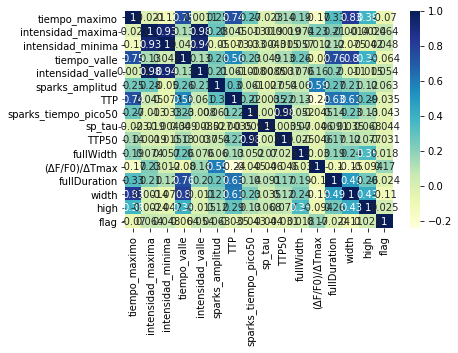

In [10]:
corr = sparks_data_list[sparks_data_list.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
sns.set(rc={'figure.figsize':(30,24)})

In [20]:
X = sparks_data_list.drop(['flag'], axis=1).values
y = sparks_data_list.flag

In [21]:
X_train,X_test,  y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y)

In [22]:
from sklearn.impute import SimpleImputer

# Tratamiento de NaN
imp = SimpleImputer(missing_values=np.nan, strategy='median') # Uso el promedio para reemplazar
imp.fit(X_train)
X_train = imp.transform(X_train)

imp.fit(X_test)
X_test = imp.transform(X_test)

In [23]:
model_baseline = XGBClassifier()

In [24]:
model_baseline.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
def get_prediction(predictions):
    new_preds = []
    for preds in predictions:
        if preds >= 0.25:
            new_preds.append(1)
        else: new_preds.append(2)
    return new_preds

In [17]:
pred_proba_train = model_baseline.predict_proba(X_train)[:, 1]
pred_proba_test = model_baseline.predict_proba(X_test)[:, 1]

pred_train = get_prediction(pred_proba_train)
pred_test = get_prediction(pred_proba_test)

In [18]:
print(f"Train ROC-AUC: {np.round(roc_auc_score(y_train, pred_proba_train), 2)}")
print(f"Test ROC-AUC: {np.round(roc_auc_score(y_test, pred_proba_test), 2)}")

Train ROC-AUC: 1.0
Test ROC-AUC: 0.73
